In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import musicalrobot

In [82]:
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa
from musicalrobot import post_data

In [83]:
from skimage import io
from skimage import feature
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops
from skimage.exposure import equalize_adapthist
from skimage.morphology import remove_small_objects  
from scipy.signal import find_peaks
from scipy.interpolate import BSpline
from irtemp import centikelvin_to_celsius

In [4]:
frames = ed.input_file('../musicalrobot/data/10_17_19_Citric_acid_shallow_plate.tiff')

In [5]:
len(frames)

5751

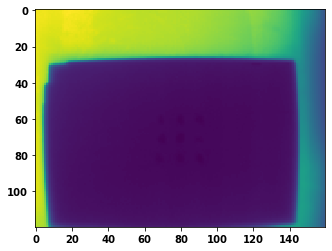

In [6]:
plt.imshow(frames[0])

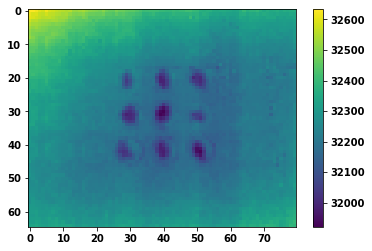

In [7]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[40:105,40:120])
plt.imshow(crop_frame[0])
plt.colorbar()

In [212]:
flip_frames = ed.flip_frame(crop_frame)

In [213]:
labeled_samples = ed.edge_detection(flip_frames,9)

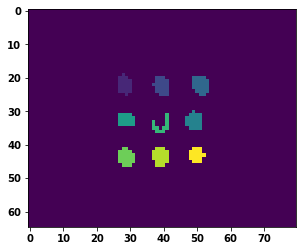

In [214]:
plt.imshow(labeled_samples)

In [148]:
regprops = ed.regprop(labeled_samples, flip_frames, 9, 3, 3)

In [149]:
regprops[2]

,Row,Column,Plate_temp(cK),Radius,Plate_coord,Area,Perim,Sample_temp(cK)
unique_index,,,,,,,,
77.0,22.0,28.0,32197.0,2.585441,33.585441,21.0,15.071068,31942.0
83.0,32.0,28.0,32197.0,2.459245,33.459245,19.0,13.414214,32047.0
90.0,43.0,28.0,32198.0,2.763953,33.763953,24.0,15.071068,32024.0
32.0,22.0,39.0,32163.0,2.705758,44.705758,23.0,15.656854,31981.0
8.0,34.0,39.0,32181.0,2.034214,44.034214,13.0,11.000000,31926.0
34.0,43.0,39.0,32202.0,2.820948,44.820948,25.0,15.656854,32002.0
9.0,22.0,51.0,32215.0,2.820948,56.820948,25.0,15.656854,32033.0
69.0,32.0,49.0,32232.0,2.763953,54.763953,24.0,15.656854,32017.0
36.0,43.0,49.0,32261.0,2.459245,54.459245,19.0,13.656854,32102.0


In [152]:
temp, plate_temp = ed.sample_temp(regprops, flip_frames)

In [129]:
frames = np.linspace(1,len(temp[6]),len(temp[6]))

Text(0.5, 1.0, 'Citric acid')

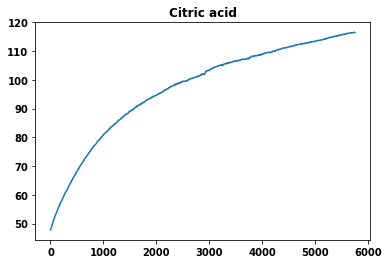

In [167]:
plt.plot(frames, temp[8])
plt.title('Citric acid')

In [136]:
plt.savefig('../../temp_profiles')

<Figure size 432x288 with 0 Axes>

In [154]:
flip_frames, regprops, inf_temp, s_peaks, p_peaks = ed.inflection_point(temp, plate_temp)

ValueError: zero-size array to reduction operation maximum which has no identity

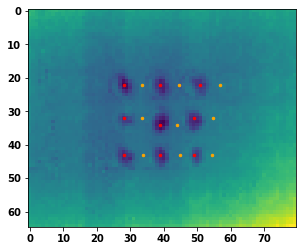

In [155]:
plt.imshow(flip_frames[0])
plt.scatter(regprops[0]['Plate_coord'],regprops[0]['Row'],c='orange',s=6)
plt.scatter(regprops[0]['Column'],regprops[0]['Row'],s=6,c='red')
# plt.title('Sample centroid and plate locations at which the temperature is monitored')